<a href="https://colab.research.google.com/github/tnichlani/Advanced-Regression/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import numpy as np
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

1. Question or problem definition.

2. Acquire training and testing data.

3. Wrangle, prepare, cleanse the data.

4. Analyze, identify patterns, and explore the data.

5. Model, predict and solve the problem.

6. Visualize, report, and present the problem solving steps and final solution.

7. Supply or submit the results.

In [250]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (4).csv


In [251]:
train_df = pd.read_csv('train.csv')

In [252]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (3).csv


In [253]:
test_df = pd.read_csv('test.csv')

In [254]:
combine = [train_df, test_df]

In [255]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [256]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [257]:
#feature names
print(train_df.columns.values)
print('Number of features:', len(train_df.columns))

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Number of features: 12


**Identify data types**
1. **Categorical**

  Survived, Sex, Embarked

2. **Ordinal** 
  
  Pclass

3. **Numerical**
   **Continous**
    Age,
    Fare
  
  **Discrete** 
    SibSp,
    Parch

4. **Alphanumeric**
    Ticket,
    Cabin

5. **Name** may contain typos

Check data types

In [258]:
train_df.info()
print('-' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [259]:
train_df.describe(include=['int64', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [260]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dantcheff, Mr. Ristiu",male,1601,G6,S
freq,1,577,7,4,644


In [261]:
test_df.describe(include=['float64', 'int64'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [262]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Wells, Master. Ralph Lester",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [263]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
        as_index=True).mean().sort_values(by='Survived', 
        ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Observations: Passenegers in class = 1 had a higher survival rate than other passenger classes

In [264]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], 
        as_index=True).mean().sort_values(by='Survived', 
        ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Observations: Passengers with 1 sibling on board had a higher survival rate

In [265]:
train_df[['Parch', 'Survived']].groupby(['Parch'], 
        as_index=True).mean().sort_values(by='Survived', 
        ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Observations: Passengers with 3 people in their family had the highest survivial rate. 

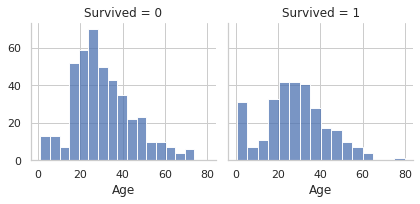

In [266]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.histplot, 'Age')
plt.show()

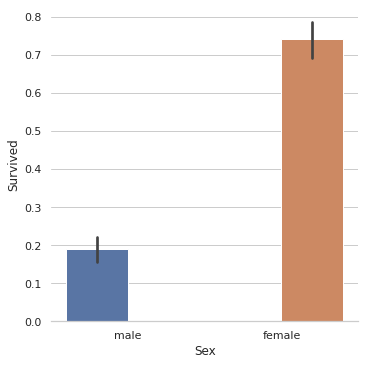

In [267]:
#analyze age 
sns.set_theme(style='whitegrid')
g = sns.catplot(data=train_df, kind='bar', x='Sex',
                y='Survived', hue='Sex',)
g.despine(left=True)
plt.show()

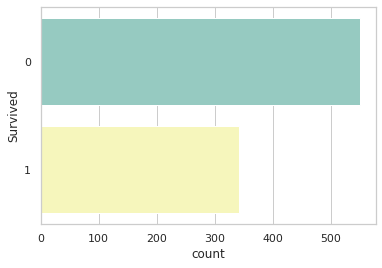

In [268]:
#count survivors
sns.countplot(y='Survived', data=train_df, palette='Set3')

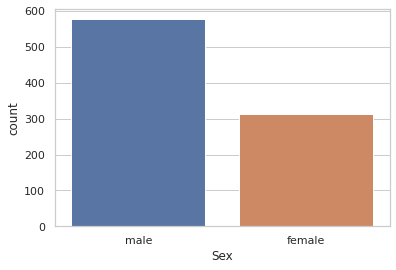

In [269]:
#count sex
sns.countplot(x='Sex', data=train_df)

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f4de0303c10>>

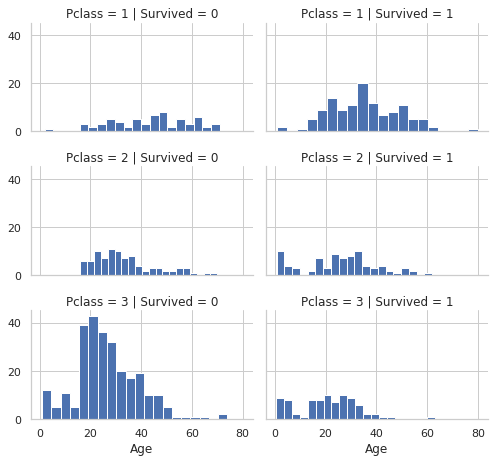

In [270]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass',
                  size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=20)
g.add_legend

Obeservations:
1. Pclass 1 had high survival rate 
2. Pclass 2 most infants survived 
3. Pclass 3 most did not survive and highest passenger density was in this class. 

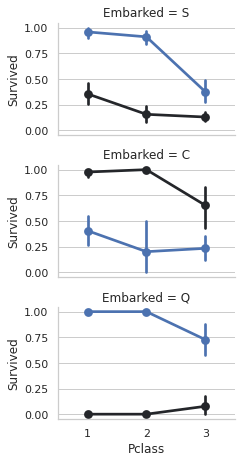

In [271]:
g = sns.FacetGrid(train_df, row="Embarked", size=2.2,
                     aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend
plt.show()

In [272]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

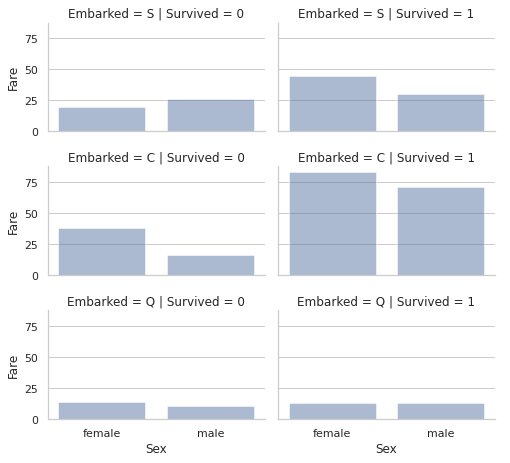

In [273]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived',
                  size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
g.add_legend()
plt.show()

In [274]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [275]:
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [276]:
combine[0].shape, combine[1].shape

((891, 10), (418, 9))

In [277]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [278]:
for dataset in combine:
  dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [279]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


The above titles can be changes to rare

In [280]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [281]:
title_mapping = {'Mr' : 1, 'Miss' : 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0) 

In [282]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2


In [283]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [284]:
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [286]:
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f4ddfbf5c10>>

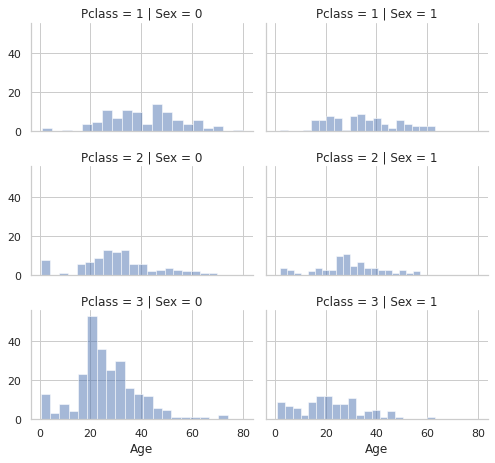

In [287]:
g = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
g.map(plt.hist, 'Age', alpha=.5, bins=20)
g.add_legend 

In [288]:
#missing values present in train_df
round(train_df.isnull().sum()/len(train_df.index), 3)

Survived    0.000
Pclass      0.000
Sex         0.000
Age         0.199
SibSp       0.000
Parch       0.000
Fare        0.000
Embarked    0.002
Title       0.000
dtype: float64

In [289]:
#missing values present in test_df
round(test_df.isnull().sum()/len(test_df.index), 3)

PassengerId    0.000
Pclass         0.000
Sex            0.000
Age            0.206
SibSp          0.000
Parch          0.000
Fare           0.002
Embarked       0.000
Title          0.000
dtype: float64

Train Data:
1. **What strategy do we use to impute missing data in age**
2. **What strategy do we use to impute missing data in Embarked**

Test Data
1. **What strategy do we use to impute missing data in age**
2. **What strategy do we use to impute missing data in fare**


In order to use any advanced imputation methods, we first need to convert categorical data into numerical so the imputer can accept the data. 

In [290]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


In [291]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


as we can see, Embarked column needs to be converted

In [292]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [293]:
dummies = pd.get_dummies(train_df['Embarked'], drop_first=True, prefix='Embarked')
tr_df = pd.concat([train_df, dummies], axis=1)
tr_df.drop('Embarked', axis=1, inplace=True)

In [294]:
tr_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,1
1,1,1,1,38.0,1,0,71.2833,3,0,0
2,1,3,1,26.0,0,0,7.9250,2,0,1
3,1,1,1,35.0,1,0,53.1000,3,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,1


In [295]:
#apply dummies to test data 
dummies_test = pd.get_dummies(test_df['Embarked'], drop_first=True, prefix='Embarked')
test_df = pd.concat([test_df, dummies_test], axis=1)
test_df.drop('Embarked', axis=1, inplace=True)

In [296]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,1,1,0
1,893,3,1,47.0,1,0,7.0000,3,0,1
2,894,2,0,62.0,0,0,9.6875,1,1,0
3,895,3,0,27.0,0,0,8.6625,1,0,1
4,896,3,1,22.0,1,1,12.2875,3,0,1


In [298]:
#drop family size 
test_df_copy = test_df.copy()
test_df_copy = test_df_copy.drop('PassengerId', axis=1)

In [299]:
#impute the missing values in age with the mean of the age
tr_df['Age'] = tr_df['Age'].fillna(tr_df['Age'].mean())
tr_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [300]:
#lets do the same for the test data
test_df_copy['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df_copy['Fare'] = test_df['Fare'].dropna()
test_df_copy.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Title         0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [301]:
#impute the fare feature with the median 
test_df_copy['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median()) 

In [302]:
test_df_copy.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Embarked_Q    0
Embarked_S    0
dtype: int64

Now lets create a new feature by combining existing features

In [303]:
tr_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,1
1,1,1,1,38.0,1,0,71.2833,3,0,0
2,1,3,1,26.0,0,0,7.9250,2,0,1
3,1,1,1,35.0,1,0,53.1000,3,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,1


In [304]:
test_df_copy.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,1,1,0
1,3,1,47.0,1,0,7.0000,3,0,1
2,2,0,62.0,0,0,9.6875,1,1,0
3,3,0,27.0,0,0,8.6625,1,0,1
4,3,1,22.0,1,1,12.2875,3,0,1


We will build the following models
1. Logisitic Regression
2. KNN
3. Gaussian
4. Decision Tree
5. Random forest 
6. XGBoost

In [305]:
X_train = tr_df.drop('Survived', axis=1)
y_train = tr_df['Survived']
X_test = test_df_copy

In [306]:
X_train.shape, y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [319]:
#Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = round(lr.score(X_train, y_train), 4)*100
acc_lr

81.47999999999999

In [320]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train), 3)*100
acc_knn

85.0

In [321]:
#gaussian 
gau = GaussianNB()
gau.fit(X_train, y_train)
y_pred_gau = gau.predict(X_test)
acc_gau = round(gau.score(X_train, y_train), 3)*100
acc_gau

80.10000000000001

In [322]:
#Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = round(dtc.score(X_train, y_train), 4)*100
acc_dtc

98.42999999999999

In [323]:
#random forest 
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = round(rfc.score(X_train, y_train), 4)*100
acc_rfc

98.42999999999999

In [324]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = round(xgb.score(X_train, y_train), 5)*100
acc_xgb

89.226

In [313]:
models = pd.DataFrame({'Model':['Logisitc', 'KNN', 'Gaussian', 'Decision Tree', 'Random Forest', 'XGB'],
                       'Score' : [acc_lr, acc_knn, acc_gau, acc_dtc, acc_rfc, acc_xgb]})

In [314]:
models.sort_values(by='Score', ascending=False)
models

,Model,Score
0,Logisitc,81.480
1,KNN,85.000
2,Gaussian,80.100
3,Decision Tree,98.430
4,Random Forest,98.430
5,XGB,89.226


In [329]:
submission = pd.DataFrame({
            'PassengerId': test_df['PassengerId'],
            'Survived': y_pred_rfc
            })
submission.to_csv('submission.csv', index = False)